# Recipe 2: Using k-means to cluster by Spotify artist


In this recipe I will be creating a new data frame that includes the total number of minutes I've listened to each artist (same process as in recipe 1), and the total number of times that I've listened to tracks from those artists. I will use kmeans clustering to cluster by artists and the relative time I've listened to them and number of their tracks I've played.

Step 1: Importing necessary packages

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

Step 2: Loading in the data and converting into a pandas data frame (same as in recipe 1)

In [2]:
with open('streamingHistory.json', 'r') as streamingData:
  data = json.load(streamingData) # loading data with json

df = pd.DataFrame(data) # converting to pandas data frame

Step 3: Convert 'msPlayed' to minutes played for each song

In [6]:
df['minsPlayed'] = df['msPlayed'] / 60000
df.head()

,endTime,artistName,trackName,msPlayed,minutesPlayed,minPlayed,minsPlayed
0,2024-03-11 13:00,Lil Tecca,Molly Girl,112149,1.869150,1.869150,1.869150
1,2024-03-11 14:34,21 Savage,No Opp Left Behind,590,0.009833,0.009833,0.009833
2,2024-03-11 14:34,Baby Keem,family ties (with Kendrick Lamar),570,0.009500,0.009500,0.009500
3,2024-03-11 14:34,Pop Smoke,Invincible,1990,0.033167,0.033167,0.033167
4,2024-03-11 14:34,Lil Tecca,Molly Girl,1130,0.018833,0.018833,0.018833


Step 4: Create a new data frame that includes total minutes played per artist and the number of plays for each track

In [19]:
group = df.groupby('artistName')
total_minutes = group['minsPlayed'].sum() # calculating total minutes played
total_plays = group['trackName'].count() # calculating number of plays for a given track

# Making a new data frame and resetting the index to begin at zero
artist_stats = pd.DataFrame({'total_minutes': total_minutes,'total_plays': total_plays}).reset_index()

artist_stats = artist_stats[artist_stats['total_minutes'] > 20] # filtering out artists I've listened to for less than 20 minutes
artist_stats.head()

,artistName,total_minutes,total_plays
1,21 Savage,198.197933,164
12,Baby Keem,54.486600,50
21,BossMan Dlow,37.366283,27
23,Bruno Mars,33.952383,19
42,Cochise,20.511333,13


Step 5: Standardize the data

In [20]:
features = artist_stats[['total_minutes', 'total_plays']] # selecting features to look at
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Step 6: Run k-means with 3 clusters and plot the results. Locate which artists are I have listened to the most in each of the 3 clusters and plot their name next to their point on the scatter plot.

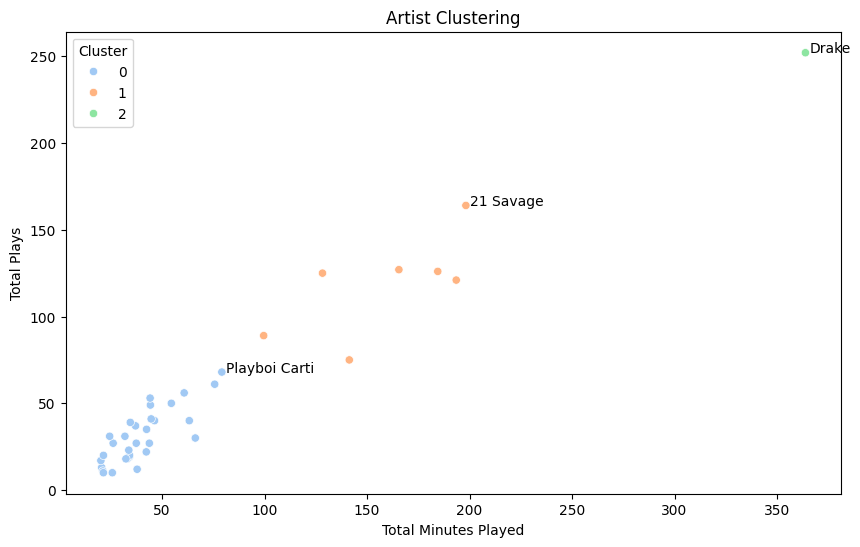

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42) # run k-means clustering with 3 clusters
artist_stats['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate the artist I've listened to the most in each cluster
top_artists = artist_stats.groupby('Cluster')['total_minutes'].idxmax()
top_artists = artist_stats.loc[top_artists]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=artist_stats, x='total_minutes', y='total_plays', hue='Cluster', palette='pastel')

# Adding the name of the artist I've listened to the most in each cluster at the point that
# represents that artist in the scatter plot
for i in range(len(top_artists)):
  artist = top_artists.iloc[i]
  plt.text(artist['total_minutes']+2, artist['total_plays'], artist['artistName'], fontsize='10')

plt.xlabel('Total Minutes Played')
plt.ylabel('Total Plays')
plt.title('Artist Clustering')
plt.show()

As you can see, from cluster 0, Playboi Carti is the artist I have listened to the most amount of time. 21 Savage is my most listened to artist in cluster 1, and in cluster 2 Drake stands alone at the top in terms of total minutes listened.